# Overview Neural Networks

The primary useful of the machine learning's models is the ability to generalize from the tranining data to *unseen data*

* Basic architecture of the Neural Networks: 
  * *Perceptron* : the input data are mapped to an output by using a generalize variation of the linear function.
  * *Multilayer Neural Network*: The neural network is a series of layer where the input layer and output layer are separate by hidden layer. 


### Single Computation Layer: *The Perceptron*

* This neural network only contains *single input layer* and *output node*.

<div align = "center">
    <img src= "https://quantstartmedia.s3.amazonaws.com/images/article-images/articles/introduction-to-artificial-neural-networks-and-the-perceptron/perceptron.png" width ="370" >
<div>

How it works?

1. The input $X$ (a set of real numbers, e.g. $[0.1, 2.1, 0.6, 1.2]$) feed to `Neural Network` through the *input layer*. *# input nodes* = *# features variables*


2. Those are multiplied by `weights` ($W$, e.g. $[0.5, 0.1, 0.3, 0.1]$) to be aggregate ($\sum$) and finally pass through *output node* in which an *output function*  (depend on your target, e.g. *sigmoid* if $y\in \{0,1\}$ ) computes the predict value $\hat{y}$. 

> If we compared $y$ (observed value) v.s. $\hat{y}$ we will realice exists error. We need to reduce this error, so to reduce we need to measure it. *Loss function* compute the error between $y$ and $\hat{y}$. The choice of *loss function* depend on the *target* (*Gini-index* if $y \in \{0,1\}$, but in actually there are others).

The relation between $W$, $\hat{y}$ and $L$ is:

$$\Delta{W} \rightarrow \Delta{\hat{y}} \rightarrow \Delta{L}$$
 
So the only way to reduce *loss* is to update the *weights* in the neural network.The update will be until the *gradient* $\partial L/\partial W \rightarrow 0$ (changes on $W$ not affect $L$)

3. The step [1] and step [2] are repeated many times, updating the *weights* using $W_{t+1} = W_{t} - \alpha \frac{\partial L}{\partial W} $ ($\alpha$ is the *learning rate* ) and reducing *loss* in each iteration. The weights in the neural network need to be updated in the (negative) direction of the error gradient by definition. This proccess is called *gradient-descent*

4. The iteration can be done using a `sample` or a `batch` (mini-batch). If each iteration we use a batch and the samples is drawn randomly we call *mini-bacth stochastic gradient decent*

5. If all iterarion end, that means *ended* an *epoch*. we can train using $n$ epochs in order to reduce the *loss*

5. The finally predict value will be $\hat{y} = W_{\text{best}}X $

> Exists 2 layers, *input layer* and *output layer*, but input layer don't compute so exists one *computational layer* 

> If the data is separable linearly the algorithm will converge the result will be good, but if the data is no separable linearly the algorithm  will not converge and the result will be poor.



### Units

The modern *neural network* is a network of small *computing units*. 

$$\text{Each take a input vector and produce a single output value}.$$
Exists several architectures, but we only talk of one of them called *feedforward network* since the computation proceeds iteratively from one layer units to next. This means exists a *hierarchy* 

The use of modern neural nets is often called *deep learning*, because modern networks are often deep (have many layers).

> Advantanges of **deep learning**
> 
> To avoid most uses of rich hand-derived features, instead building neural networks that take raw words as inputs
and learn to induce features as part of the process of learning and if we have sufficient data is the right tool to build a model for learning.
>
> If we have large dataset and build a large NN the performance will be better than traditional AI (logistic or Linear)

A *unit* takes a set of real valued numbers as input, performs some computation on them, and produces an output.

$$h =\Phi (\sum_{i=1}^{d}w_i x_i + b) = \Phi(XW + b)$$

1. $w_i$ represent the weight of an specific $x_{i}$ input
2. $b$ is the *bias*
3. $\Phi$ is the *activation function*.
4. $XW+b$ pre activation value.
5. $h$ post activation value.

The simplest activation function, and perhaps the most commonly used, is the recReLU tified linear unit, also called the **ReLU**. It is the same of the value input if it is positive, otherwise, 0.

$$\Phi(z) = \max{(z,0)}$$

The benefits:

- It reduce the likelihood of the problem of *gradient to vanishing* since the gradient, $\Phi^{'}(z)$, is $1$ if $z \gt 0 $, and $0$ if $z \leq 0$
- It increaces the likehood of *sparse* when $z\lt 0$. It is one that contains mostly zeros and few non-zero entries. 
- Generally, a non-linear function transforms the *inputs* *non-linear-separability* into inputs *linear-separability* in the next layer.
- There are others concecuences like the update on $w_t$ (based in chain rule) only take account the gradient if $XW+b >0$
- ...

Others *derivative activation functions*
- Identity: $v = \Phi(v)$. It used when $ y \in \mathbb{R}$, its derivative is $\Phi'(v) = 1$
- Sigmoid function: $\Phi(v) = \frac{1}{(1 + e^{-v})}$. It is used like *output function* when $y \in (0,1)$ and its derivative is $\Phi'(v) = \Phi(v)(1 -\Phi(v))$

### Feedforward Neural Networks

A feedforward network is a multilayer network in which the units are connected with *no cycles*; the outputs from units in
each layer are passed to units in the next higher layer, and no outputs are passed back to lower layers

Simple feedforward networks have three kinds of nodes: *input units*, *hidden units* (since it is not visible to user), and *output units*.

The input layer only transmit the features values. So we don't take account.

The core of the neural network are *hidden units*. Those work like any unit, that is, it needs *input vector*, then multiply by weigths an then pass to activation function.

Each neural network have $L$ hidden layers, and each hidden layer have $l$ hidden units ($l$ is referred to as *dimensionality* of this layer). Each *unit* in each layer takes as input the outputs
from all the units in the previous layer.

In a *typical architecture* we have the same quantity of units in each *hidden layer* and apply the same *activation function*. That's means we can combine the units of each layer and create a vector of units


Let $X$ the input data and its dimention $d$, in each hidden layer of the $L$ hidden layers we have $p$ units, the activation function $\Phi$ and finally $\Theta$ output function

1. $h_1 = \Phi(W_1X) $

2. $h_t = \Phi(W_t h_{t-1})$ for $t \in (2, L)$

3. $O = \Theta(W_Oh_t) $

The dimention of $X$ is $d$ multiplied by $W_1$ of the dimention $\text{(d, p)}$, transform the input $d$ to $p$.

From the layer 2 to L, the dimentions are the same p.

In the output layer, $h_L$ can be multiplied by $W_O$ with dimention $\text{(p,1)}$ in order to get convert to single values (for Sigmoid) or it can be multiplied by $W_O$ of dimention $\text{(p,k)}$ convert to dimention $k$, where $k$ is the number of clases (For SoftMax).

> In a classical architecture we use the same activation function
throughout the computational pipeline, with the only deviation caused by the nature of
the output layer
> 
> This type of classical architecture can vary depending on the application, for example, for *dimentionality reduction*. This is achieve with other type of architecture like *AutoEnconder*, where the dimentions of inputs and output are the same, but exists an bottleneck in which the representation of the data is reduced.
> 
> Work with image implies modify the *classical architecture*, convultional neural network is architecture in which some neurons sharing the connections and prunning some connections.

### Training a Neural Network with Backpropagation

In case of multi-layer networks, the process of training is not easy since the gradient of loss function respect to an specific weight is a composition function.

The gradient of composition function is computed using *backpropagation algorithm* that use:

1. *Chain Rule* of differential calculus.
2. *Dynamic Programming*.

It contains two mains phases:

1. **Forward phase**: In this phase training inputs are fed to neural networks, the final predicted output is computed using *current* weights in *cascade*. The derivative of loss funtions respect to predicted output can be computed

2. **Backward phase**: Using chain rule is computed the gradient of loss function respect weights and using those gradients update the weights.

Consider a sequence of hidden units $h_1, h_2,...,h_k$ followed by output $o$, with respect to which the loss function $L$ is computed. Furthermore, assume that the weight of the connection from hidden unit $h_r$ to
$h_{r+1}$ is $w_{(hr,h_{r+1})}$.

$$ \frac{\partial L}{\partial w_{(h_{r-1, r})}}  = \frac{\partial L}{\partial o} [\sum_{[h_r, ..., h_k, o] \:\in \: P }  \frac{\partial o}{\partial h_k} \prod_{i=r}^{k-1} \frac{\partial h_{i}}{\partial h_{i-1}}] \frac{\partial h_r}{\partial w_{(h_{r-1, r})}}$$

Using dynamic programming compute the gradients of k-nearest nodes to output, and then campute the gradient recursivelly gradients of early layers. 

### Practical Issues in Neural Network Training

#### The Problem of Overfitting

Always there is a gap between training and test data performance, even if the model predicts the targets on the training data perfectly.

This gap become larger when the model increases its complexity and the data set is small.

If we have a small training data, the set of *weights* that minimize the loss functions are more than if we had a large training data. So if we a model trains on small data set exists high likely the algorithm chose the incorrect weights resulting a poor perforrmance on unseen test data. On small data set a model can't *generalize* very well. And since exists a enought big set of parameters that minimize the loss function in other process of traning will compute other weights resulting high *variance* on predicted target.

A model become to be more complex when add more parameters (*weights* to compute) to model. This complexity on small dataset reduces even more the performance of the model on unseen test data.

A good *rule of thumb*: training data = 2 or 3 x n parameters of the nn (neural network)

#### Regularization

If we contrain to the model to use a few non-zero parameters, such as these reduce at minimun the loss function, it would increase the ability of the modelo to *generalize* or reduce the *overfitting*.

> In general, it is often advisable to use more complex models with regularization rather than
simpler models without regularization

The gradient descent update rule for the weights $W_t^{j}$ ​with *Lasso* regularization becomes

 $$W_{t+1}^{j} = W_{t}^{j} - \alpha (\frac{\partial L}{\partial W^{j}} +  λ \:\text{sign}(W_t^{j}))$$

####  Early Stopping

#### Adaptive learning rate

*Adagrad*

A usually rate at which decreces the learning rate is $ \eta = \frac{\eta_{0}}{\sqrt{t+c}}$, but we can use a more softistic learning rate based in history of the gradient of loss function.

$$\eta_i = \eta_{0} / \sqrt{ s_(i,t) +c}$$

In which $s_i$ is the sum of squares of the gradient of loss function or the variance up to $t$ for $i^{th}$ feature. So when the variance is high (that is, the updates of weights, $\Delta{w_i}$, were large) we decrease the learning rate for next update to soft the weights.

#### Trading Off Breadth for Depth

#### The Vanishing and Exploding Gradient Problems

####  Local and Spurious Optima

<!-- We can represent the *weights* and *bias* of a layer by matrix and vector.

For any layer
$$\textbf{W} = \begin{bmatrix}
w_{1,1} & w_{1,2} & ... & w_{1,l}\\
w_{2,1} & w_{2,2} & ... & w_{2,l}\\
... & ... &  & ... \\
w_{d,1} & w_{q,2} & ... & w_{d,l}\\
\end{bmatrix}, \; b = [b_1, b_2, ..., b_l]$$ -->

<!-- $$\textbf{W}^{(i)} = \begin{bmatrix}
w_{1,1}^{(i)} & w_{1,2}^{(i)} & ... & w_{1,l}^{(i)}\\
w_{2,1}^{(i)} & w_{2,2}^{(i)} & ... & w_{2,l}^{(i)}\\
... & ... &  & ... \\
w_{d,1}^{(i)} & w_{q,2}^{(i)} & ... & w_{d,l}^{(i)}\\
\end{bmatrix}, \; b^{(i)} = [b_1^{(i)}, b_2^{(i)}, ..., b_l^{(i)}]$$ -->
<!-- Where $d$ is the quantity of input features based in previous layer. $l$ is the quantity of hidden units in the current hidden layer.

So, by layer

$${\textbf{h}} = \Phi(\textbf{XW} + \textbf{b})$$

Where $\textbf{X}$ is the matrix of input data. 

If we suppose we have $d$ features in $\textbf{X}$ for the input layer  and the $l$ units in the next layer (hidden layer), the matrix $\textbf{W}$ would have a dimention $(d,l)$, or more formal $\textbf{W} \in \R^{(d,l)} $ ,and the dimention of $\textbf{h}$ would be $\R^{l}$. 

As we can see, the $d$ input features transform in $l$ features for the next layer.

If only have $1$ hidden layer, the next layer would be *output layer*. 

In the *output layer*, there are weights and bias as well, but usually the bias is dropped. 

For real value output, we only multiply the features of dimention $l$ of the previous layer by weights $U \in \R^{(l, d)}$, where $d$ is the quantity of columns of outpout.

$$\textbf{z} = \textbf{Uh}$$ -->

<!-- For task of *classification*, we need to normalize using a function like *softmax*. 

For any vector $\textbf{z}$ of dimensionality $d$, the softmax is defined as:

$$\text{softmax}(z_i)=\frac{e^{z_i}}{\sum_{i=1}^{d}e^{z_i}}$$

The dimentionaliity of the  vector $\textbf{z}$ is $d$. So only need pass the values for the softmax and compute the probability to belong to each class.

In this case, $d$ is the each class. The vector $[1, 0, 0, 0]$ has a dimenction of $4$.
 -->

<!-- Here are the final equations for a feedforward network with a single hidden layer, which takes an input vector $\textbf{X}$, outputs a probability distribution $\hat{\textbf{y}}$, and is parameterized by weight matrices $\textbf{W}^{(1)}$ and $\textbf{W}^{(2)}$ and a bias vector $\textbf{b}$


$${\textbf{h}} = \Phi(\textbf{XW}^{(1)} + \textbf{b})$$

$$\textbf{z} = \textbf{W}^{(2)}\textbf{h}$$

$$\hat{\textbf{y}} = \text{softmax(\textbf{z})}$$

If the dimentionality of $\textbf{z}$ is $d$, so $\hat{\textbf{y}}$ will have $d$ dimentions as well. -->
<!-- The feedforward *neural network* is designed to minimized the error in prediction. This implies to have a *loss function*. 

For *real-values* output , Mean Absolute Error (MAE) can a be a loss function or R-squared or any other.

For task of classification, we have others like *Log-Loss*, *Cross-entropy*, and any other. The most usued is *Cross-Entropy* for multinomial classification problem.

$$L = - \log{(\hat{\textbf{y}})}$$

Recall, *Cross-Entropy* measures the dissimilarity between ditributions of probabilities. -->
<!-- The parameters that the model can handle to improve the prediction are the weights and biases
The initial $\textbf{W}^{(1)}$, $\textbf{W}^{(2)}$ and $\textbf{b}$ has a normal or uniform distribution, then those are updated using *Stochastic Gradient Desent*.

Given $\Theta = (\textbf{W}^{(1)}, \textbf{W}^{(2)}, \textbf{b})$

$$\nabla L = \frac{\partial L}{\partial {\Theta}}$$
<!-- = \begin{pmatrix}
\frac{-\partial log(\hat{y})}{\partial w_i} \\
\frac{-\partial log(\hat{y})}{\partial w_i} \\
... \\
\frac{-\partial log(\hat{y})}{\partial w_i} 
\end{pmatrix} -->

<!-- Any parameter need to be updated using (we need to use the chain rule to allow update any parameter):
$$\Theta_t \leftarrow \Theta_{t-1} + \eta \nabla L$$

Or *Mini-Batch Stochastic Gradient Desent*.

$$\Theta_t \leftarrow \Theta_{t-1} + \eta \sum \nabla L$$

Where $\eta$ is the *learning rate*
### Training a Neural Network with Backpropagation
The backpropagation has two phases:

1. Forward Phase: we obtain $\hat{y}$ using the weights and biases of the all layers. For the current neural network. Then $\hat{y}$ is used to compute the *loss*, and the partial derivatives using the *chain rule*.

2. Backward Phase: we update the *weights* and *biases*  -->

<!-- Let $X = (x_1, x_2, ..., x_d )$ be the variable that contain $d$ features

Let $y = \{1, 0\}$ a binary class variable, called *observed value*. The meaning of the observed value is *it is given as a part of training data, and our goal is predict it with $X$*. So when don't have $y$ we have the a good approximation.

The input layer contains $d$ nodes, one of each feature.This layer *transmits* the $d$ features  with the connections (edges) of Weights $W = (w_1, w_2, \dots, w_d)$ to the output node. The input layer don't perform any computation.

The output layer is computed:
* The linear function $WX = \sum_{i=1}^{d}w_{i}x_{i} = a_i$. this convert vector to aggregate values.
* Subsequently the *Heaviside step function*, $\text{H}(a_i)$ is applied on abover result, returning $0$ if $a_i<=0$ and 1 if $a>0$. This  is binary classification. This serves as *activation function*.

So the predcition $\hat{y}$ is computed as:
$$\hat{y} = \text{H}\{\sum_{i=1}^{d}w_{i}x_{i}\} $$ -->
<!-- The error of predicion $y-\hat{y}$ is one of the values drawn from the set $\{−2, 0, +2\}$. 

But the are other way to detect the error of prediction. The observation is correctly classified if $y\hat{y}=1$, the and is missclassificated if $y\hat{y}=-1$.

In cases where *the observation is missclassified*, **the weights in the neural network need to be updated** in the (negative)
direction of the error gradient.

Due to fact that the input layer don't perform computation, the perceptron is considered like is considered a single-layer
network. Only one layer (output layer) perform the computations. -->
<!-- The setting usually add a constant $b$ in the model called **bias**, to allow at model handle unbalanced in the binary class distribution $y$. 

This can be incorporated in the model like another weight more, but the $x$ for this variable is 1
The perceptron algorithm was designed to minimize the number of *misclassifications*

How to estimate the $W$?
* The estimation of $W$ must minimize the error $y - \hat{y}$
  * If the $y$ and $\hat{y}$ were continuous, we would use Least Square, $(y - \hat{y})^2$

* Since error $y - \hat{y}$ is not differentiable respect to $w$, we can not compute the gradient, so the `Perceptron` use a version smoothed. This function (called **Loss Function** ) has to be minimized.  

  * The gradient of this function $y - \hat{y}$ is $\nabla L =(y - \hat{y})X$. This function can not equate to zero and compute $W$. So we need applied the theory about *gradient decent*, only for the *misclassification* values
    * Randomly instantiate $\hat{W} = [\hat{w_1}, \dots, \hat{w_n}]$
    * Until convergence or some stopping rule is reached.
      * For each $n \in \{1, ..., N \}$ random
        * $\hat{y_n} = \text{sign}({W_nX_n})$ 
        * If $y_n\hat{y_n}=-1$,  $W \leftarrow W + \alpha (y_n - \hat{y}_n)X_n $=$(\hat{w}_1, ... , \hat{w}_d) \leftarrow (\hat{w}_1, ... , \hat{w}_d) + \alpha (y_n - \hat{y}_n)X_n $
The above iterations are on one sample by sample. But thi can done by *batch*, $S$, chosen randomly

$$W \leftarrow W +  \alpha \sum (y_n - \hat{y}_n)X_n = (\hat{w}_1, ... , \hat{w}_d) \leftarrow (\hat{w}_1, ... , \hat{w}_d) + \alpha \sum (y_n - \hat{y}_n)X_n $$ -->
<!-- > *Gradient*
> 
> The *gradient* can be defined over entire dataset, over one sample, or a batch.
> 
> Example for this gradient
> 1. $\nabla L = \sum_{X, y\: \in\: D}(y - \hat{y})X$
> 2. $\nabla L = \sum_{X, y\: \in\: B}(y - \hat{y})X$
> 3. $\nabla L =(y - \hat{y})X$
> 
> The training algorithm of neural networks works by feeding each input data instance $X$ into the network one by one (or in small batches) to create the prediction. -->

### Using H2O Framework

Description

In [1]:
import matplotlib.pyplot as plt
import h2o
from h2o.estimators import H2ODeepLearningEstimator
from h2o.grid.grid_search import H2OGridSearch
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
h2o.init(min_mem_size=2)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 22.0.1+8-16, mixed mode, sharing)
  Starting server from C:\Users\dante\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\dante\AppData\Local\Temp\tmpc8rgbnes
  JVM stdout: C:\Users\dante\AppData\Local\Temp\tmpc8rgbnes\h2o_dante_started_from_python.out
  JVM stderr: C:\Users\dante\AppData\Local\Temp\tmpc8rgbnes\h2o_dante_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Lima
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.2
H2O_cluster_version_age:,1 month and 12 days
H2O_cluster_name:,H2O_from_python_dante_hsu5uc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.909 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


`h2o.remove_all()`
- Removes all objects from H2O with possibility to specify models and frames to retain. 

* Retained keys must be keys of models and frames only. 

* For models retained, training and validation frames are retained as well. Cross validation models of a retained model are NOT retained automatically, those must be specified explicitely.

In [3]:
# Import the insurance dataset into H2O:
insurance = h2o.import_file("https://s3.amazonaws.com/h2o-public-test-data/smalldata/glm_test/insurance.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [4]:
insurance[['District', 'Group', 'Age']] = insurance[['District', 'Group', 'Age']].asfactor()
insurance[["Holders", "Claims"]] = insurance[["Holders", "Claims"]].asnumeric()

In [10]:
insurance["claims_no_skewed"] = insurance["Claims"]**(1/6)

In [12]:
train, test = insurance.split_frame(ratios=[.8], seed=1234)

### Run model with default params

The main default parameters

```python
{'standardize': True,
 'activation': 'rectifier',
 'hidden': [200, 200],
 'epochs': 10.0,
 'seed': -1,
 'adaptive_rate': True}
```
To see all default parameters  `model.get_params()`

In [13]:
name_model = 'deep_learning'
deep_learning = H2ODeepLearningEstimator(
    standardize= True, 
    seed=1234, 
    epochs=200,
    mini_batch_size = 5, 
    model_id=name_model)

features = ['District', 'Group', 'Age'] + ['Holders']
target = 'claims_no_skewed'

deep_learning.train(features, target, train, model_id=name_model)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: deep_learning


Status of Neuron Layers: predicting claims_no_skewed, regression, gaussian distribution, Quadratic loss, 43,801 weights/biases, 521.7 KB, 9,200 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate             rate_rms              momentum    mean_weight            weight_rms           mean_bias             bias_rms
--  -------  -------  ---------  ---------  ----  ----  --------------------  --------------------  ----------  ---------------------  -------------------  --------------------  -----------------------
    1        16       Input      0.0
    2        200      Rectifier  0.0        0.0   0.0   0.21125969337153946   0.388128399848938     0.0         -0.005801033561804161  0.10426759719848633  0.4179242684524809    0.05029129981994629
    3        200      Rectifier  0.0        0.0   0.0   0.30822444207018124   0.30940842628479004   0.0         -0.012749907898888633  0.0717943012714386   0.9735858182152074    0.013701528310775757
    4        1        Linear                0.0   0.0   0.004026426661293953  0.005276111885905266  0.0         -0.010748284716100898  0.06132012605667114  0.002057736390729023  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.0016552332539509719
RMSE: 0.04068455792989487
MAE: 0.02497084633378307
RMSLE: 0.016648400645637957
Mean Residual Deviance: 0.0016552332539509719

Scoring History: 
    timestamp            duration    training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2024-06-26 00:11:32  0.000 sec                     0         0             0          nan              nan                  nan             nan
    2024-06-26 00:11:34  2.159 sec   260 obs/sec       10        1             460        0.160958         0.0259074            0.118761        0.824815
    2024-06-26 00:11:35  3.557 sec   2915 obs/sec      200       20            9200       0.0406846        0.00165523           0.0249708       0.988807

Variable Importances: 
variable              relative_importance    scaled_importance    percentage
--------------------  ---------------------  -------------------  ------------
Holders               1                      1                    0.0869494
Age.>35               0.976814               0.976814             0.0849333
Age.<25               0.934937               0.934937             0.0812922
District.4            0.896945               0.896945             0.0779888
Group.<1l             0.890258               0.890258             0.0774073
Group.>2l             0.887493               0.887493             0.0771669
Group.1-1.5l          0.875703               0.875703             0.0761418
District.2            0.872443               0.872443             0.0758583
District.3            0.87034                0.87034              0.0756755
District.1            0.845684               0.845684             0.0735317
Group.1.5-2l          0.834695               0.834695             0.0725762
Age.25-29             0.832652               0.832652             0.0723985
Age.30-35             0.782984               0.782984             0.06808
District.missing(NA)  0                      0                    0
Group.missing(NA)     0                      0                    0
Age.missing(NA)       0                      0                    0

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [14]:
deep_learning.model_performance(train)

ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.001655233253950972
RMSE: 0.04068455792989488
MAE: 0.02497084633378307
RMSLE: 0.016648400645637957
Mean Residual Deviance: 0.001655233253950972

In [15]:
deep_learning.model_performance(test)

ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.07223087068930717
RMSE: 0.26875801511640013
MAE: 0.10968918912800361
RMSLE: 0.17748126181207563
Mean Residual Deviance: 0.07223087068930717

Since our metric that we need to be more sensitive to outliers *RMSE* is chosen

We note 
- $\text{RMSE}_{\text{train}}:\sim 3.975$
- $\text{RMSE}_{\text{test}}:\sim 8.2972$

It points out the possibly that exists *overfitting*

### Grid (Hyperparameter) Search

H2O supports two types of grid search – traditional (or “cartesian”) grid search and random grid search. In a cartesian grid search, users specify a set of values for each hyperparameter that they want to search over, and H2O will train a model for every combination of the hyperparameter values. This means that if you have three hyperparameters and you specify 5, 10 and 2 values for each, your grid will contain a total of `5*10*2 = 100` models

In random grid search, the user specifies the hyperparameter space in the exact same way, except H2O will sample uniformly from the set of all possible hyperparameter value combinations. In random grid search, the user also specifies a stopping criterion, which controls when the random grid search is completed. The user can tell the random grid search to stop by specifying a maximum number of models or the maximum number of seconds allowed for the search. The user may also specify a performance-metric-based stopping criterion, which will stop the random grid search when the performance stops improving by a specified amount.

In [37]:
# Define hyperparameters to search

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 
                   'max_models': 40, 'max_runtime_secs': 60*10,
                   'stopping_metric':"RMSE",
                   'seed': 1234}

hyper_params = {
    "activation": ["rectifier", "tanh", "maxout", "rectifier_with_dropout", "maxout__with_dropout"],
    "hidden": [[100, 100], [200, 200], [300, 300]],
    "epochs": [100, 150, 200],
    "loss":["quadratic", "absolute"]}

# !mini_batch_size can't pass like hyper param

# Initialize the deep learning estimator
deep_learning_estimator = H2ODeepLearningEstimator(
    distribution="gaussian",
    stopping_rounds=5,
    stopping_tolerance=1e-4,
    stopping_metric="RMSE",
    mini_batch_size=5
)

# Perform grid search
grid = H2OGridSearch(model=deep_learning_estimator, 
                     hyper_params=hyper_params, 
                     search_criteria=search_criteria)

grid.train(features, target, train)

deeplearning Grid Build progress: |██████████████████████████████████████████████| (done) 100%


,activation,epochs,hidden,loss,model_ids,residual_deviance
,Maxout,200.0,"[100, 100]",Absolute,Grid_DeepLearning_py_10_sid_aa10_model_python_1719378509030_4_model_35,0.0011358
,Maxout,150.0,"[200, 200]",Quadratic,Grid_DeepLearning_py_10_sid_aa10_model_python_1719378509030_4_model_3,0.0018896
,MaxoutWithDropout,200.0,"[300, 300]",Absolute,Grid_DeepLearning_py_10_sid_aa10_model_python_1719378509030_4_model_36,0.0020346
,Rectifier,200.0,"[200, 200]",Quadratic,Grid_DeepLearning_py_10_sid_aa10_model_python_1719378509030_4_model_29,0.0022915
,MaxoutWithDropout,150.0,"[300, 300]",Quadratic,Grid_DeepLearning_py_10_sid_aa10_model_python_1719378509030_4_model_38,0.0023370
,Rectifier,200.0,"[200, 200]",Absolute,Grid_DeepLearning_py_10_sid_aa10_model_python_1719378509030_4_model_17,0.0027667
,MaxoutWithDropout,150.0,"[200, 200]",Absolute,Grid_DeepLearning_py_10_sid_aa10_model_python_1719378509030_4_model_6,0.0028171
,Tanh,200.0,"[300, 300]",Quadratic,Grid_DeepLearning_py_10_sid_aa10_model_python_1719378509030_4_model_13,0.0034904
,Tanh,200.0,"[200, 200]",Absolute,Grid_DeepLearning_py_10_sid_aa10_model_python_1719378509030_4_model_39,0.0042282
,Maxout,100.0,"[200, 200]",Quadratic,Grid_DeepLearning_py_10_sid_aa10_model_python_1719378509030_4_model_31,0.0045328


When *activation* is assing the values "..._with_dropout", the hidden_dropout_ratios will be default=0.5 for the first hidden layer

In [29]:
# Get the best model from grid search
best_model = grid.get_grid()[0]

In [32]:
best_model.model_performance(test)

ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 0.07097524487501171
RMSE: 0.2664117956754387
MAE: 0.10265169517266243
RMSLE: 0.17669484306673278
Mean Residual Deviance: 0.07097524487501171

### Defining Parameters

Parameters are optional unless specified as required.

In [220]:
deep_learning = H2ODeepLearningEstimator(
    model_id='insurance_model',
    activation="rectifier",                           
    # rectifier -> Max(0, x) 
    # maxout 
    adaptive_rate=True,     # Adaptive learning rate (ADADELTA)                 
    epochs=100,
    fast_mode=False,              
    force_load_balance=True,         
    # It controls how training data is distributed and processed across  
    # available computational resources (cores) during training
    hidden=[100, 100, 100], 
    initial_weight_distribution='uniform', 
    initial_weight_scale=1,
    loss='quadratic',  
    mini_batch_size=1,        
    input_dropout_ratio=0,        
    # Specify the input layer dropout ratio to improve generalization  
    overwrite_with_best_model=True,
    # Specify whether to overwrite the final
    # model with the best model found during training, 
    # based on the option specified for stopping_metric
    stopping_metric='deviance',
    shuffle_training_data=False,
    sparse=False,
    train_samples_per_iteration=-2,            
    # H2O leverages distributed computing with MapReduce for large datasets. 
    # This parameter controls the amount of data handled by each worker node                         
    # in the distributed system during an iteration.
    # train_samples_per_iteration=-2 (automatic)
    variable_importances=True,
    reproducible=False,
    categorical_encoding = 'one_hot_internal',      
    distribution='gaussian',
    # keep_cross_validation_models=False, 
    standardize=True,
    # Standardization is highly recommended. As such, this option is enabled by default.         
    # If you do not use standardization, the results can include components 
    # that are dominated by variables that appear to have larger variances relative to 
    # other attributes as a matter of scale, rather than true contribution
    seed=1234)

*Load balancing*

It controls how the training process distributes computations across available cores on your system, potentially impacting training speed, especially for small datasets

- Deep learning training involves computationally expensive operations like matrix multiplications and convolutions.
- To leverage the processing power of multi-core CPUs or GPUs, deep learning frameworks typically employ load balancing techniques.
- Load balancing distributes these computations across multiple cores, allowing for faster training compared to using a single core.

`train_samples_per_iteration`

The "train_samples_per_iteration" parameter is used in certain machine learning contexts, particularly those involving distributed computing and big data processing, like MapReduce. It determines how many training samples are used in each iteration of the training process.

Here's what each value means:

A positive number (e.g., 1000): This specifies the exact number of global training samples to be used per MapReduce iteration. If you set this to a specific number, the system will train on that number of samples before updating the model parameters.

- *0*: This specifies that one epoch should be used. An epoch is one complete pass through the entire training dataset. So, if you set this to 0, the system will train on all samples once before updating the model parameters.

- *-1*: This specifies that all available data should be used. This could mean using more than one epoch's worth of data, especially if the data is replicated. The system will train on all available samples before updating the model parameters.

- *-2*: This specifies that the system should use automatic (default) values. The system will decide how many samples to use based on its own internal rules. This is often a good choice if you're unsure what value to use.

In [341]:
# split into train and test
train, test = insurance.split_frame(ratios=[.8], seed=1234)

In [342]:
features = ['District', 'Group', 'Age', 'HoldersMaxMin']
target = 'ClaimsMaxMin'

In [343]:
dl.train(x=features, y=target, training_frame=train)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: insurance_model


Status of Neuron Layers: predicting ClaimsMaxMin, regression, gaussian distribution, Quadratic loss, 22,001 weights/biases, 265.7 KB, 460 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate             rate_rms             momentum    mean_weight            weight_rms          mean_bias               bias_rms
--  -------  -------  ---------  ---------  ----  ----  --------------------  -------------------  ----------  ---------------------  ------------------  ----------------------  -----------------------
    1        16       Input      0.0
    2        100      Rectifier  0.0        0.0   0.0   0.2008459194812442    0.4041060209274292   0.0         -0.012553389951572172  0.5673367977142334  0.4990293464738486      0.026525765657424927
    3        100      Rectifier  0.0        0.0   0.0   0.058068238024873424  0.23121142387390137  0.0         0.003193879124041996   0.5619332790374756  0.9985514818500992      0.012519389390945435
    4        100      Rectifier  0.0        0.0   0.0   0.14036265761856728   0.3601173162460327   0.0         0.010820110790149008   0.5657610893249512  0.999681897634001       0.0025928597897291183
    5        1        Linear                0.0   0.0   0.060254325345959     0.23513072729110718  0.0         0.025247472617775202   0.5694663524627686  -0.0007547858054070578  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 7.703963747233991
RMSE: 2.775601510886242
MAE: 2.107619133978372
RMSLE: NaN
Mean Residual Deviance: 7.703963747233991

Scoring History: 
    timestamp            duration    training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2024-06-23 16:55:26  0.000 sec                     0         0             0          nan              nan                  nan             nan
    2024-06-23 16:55:26  0.011 sec   11500 obs/sec     1         1             46         11.3398          128.592              9.44102         -3282.64
    2024-06-23 16:55:27  0.063 sec   8363 obs/sec      10        10            460        2.7756           7.70396              2.10762         -195.724

Variable Importances: 
variable              relative_importance    scaled_importance    percentage
--------------------  ---------------------  -------------------  ------------
Age.>35               1                      1                    0.0841256
District.3            0.979277               0.979277             0.0823822
Group.<1l             0.967993               0.967993             0.0814329
Age.<25               0.954316               0.954316             0.0802824
Group.1-1.5l          0.95071                0.95071              0.0799791
District.2            0.917737               0.917737             0.0772051
District.1            0.90912                0.90912              0.0764803
Age.25-29             0.906809               0.906809             0.0762858
District.4            0.896556               0.896556             0.0754233
Group.>2l             0.880718               0.880718             0.0740909
HoldersMaxMin         0.874134               0.874134             0.073537
Group.1.5-2l          0.862223               0.862223             0.072535
Age.30-35             0.7874                 0.7874               0.0662404
District.missing(NA)  0                      0                    0
Group.missing(NA)     0                      0                    0
Age.missing(NA)       0                      0                    0

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Perceptron

In [2]:
coef = [-1.5, 4]
x = np.random.uniform(0, 1, (1000, 2))
a = x * coef
y = np.where(a.sum(axis=1) <= 0, -1, 1)
data = pd.DataFrame(np.concatenate((x, y.reshape(1000, 1)),
                    axis=1), columns=['x_1', 'x_2', 'y'])

# split the data into train and test
train = data.sample(frac=0.7, random_state=0)
test = data.drop(train.index)

In [3]:
train

,x_1,x_2,y
993,0.249345,0.003344,-1.0
859,0.455059,0.749307,1.0
298,0.069360,0.706657,1.0
553,0.789155,0.683595,1.0
672,0.393734,0.152788,1.0
...,...,...,...
509,0.025823,0.221816,1.0
340,0.404846,0.908163,1.0
221,0.976717,0.290247,-1.0
928,0.676907,0.958519,1.0


In [46]:
clf_intercept = Perceptron(tol=1e-3, random_state=0, fit_intercept=True)
clf_intercept.fit(train[['x_1', 'x_2']], train['y'])
y_pred = clf_intercept.predict(test[['x_1', 'x_2']])

In [48]:
def plot_decision_surface(data_input, model, h=0.01):
    # Get the upper and lower bounds of the two input dimensions
    x_min, x_max = data_input['x_1'].agg(['min', 'max'])
    y_min, y_max = data_input['x_2'].agg(['min', 'max'])

    # Create the mesh over the input space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    y_pred = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Quantise the model output to the integers 0 & 1
    g_pred = np.where(y_pred > 0, 1, -1)

    # print(y_color)
    # Plot the inputs and decision boundary on the input space
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.scatter(xx.ravel(), yy.ravel(), s=10, c=g_pred.ravel(), alpha=0.4)
    ax.scatter(data_input['x_1'], data_input['x_2'], s=30,
               c=data_input['y'], edgecolors='grey', alpha=0.7)
    ax.set_xlabel(r'$X_1$')
    ax.set_ylabel(r'$X_2$')

    return ax


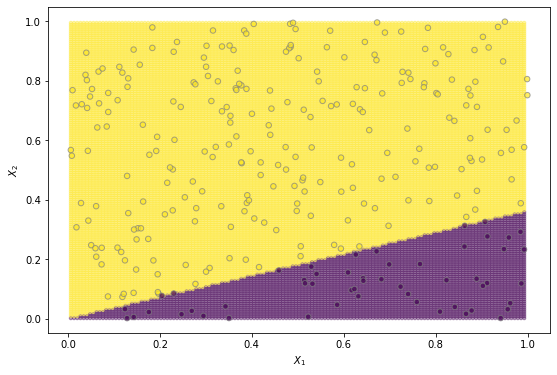

In [49]:
plot_decision_surface(test, clf_intercept, 0.007)
plt.show()

### Gradient-Based Optimization

Optimization refers to the task of either minimizing or maximizing some function $f(x)$ by altering $x$.

We usually phrase most optimization problems in terms of minimizing $f(x)$

The function we want to *minimize* or *maximize* is called the `objective function`, or `criterion`.

When we are minimizing it, we may also call it the `cost function`, `loss function`, or `error function`

The `maximun` or `minimun` is defined with a superscript `*`, like $x^{*} = \text{arg min}f(x)$

## Dropout

https://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf

## Multilayer 

In [25]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
# Load the data
data_crime = pd.read_stata(r'C:\Users\LENOVO\Desktop\python_course\datascience\machine-learning-models\data_dta\CRIME1.dta')
# Metadata --> http://eswf.uni-koeln.de/daten/crime1.html

# Generate the variable arr86, which a person is labeled equal to 0, if he or she has not arrested in 1986
# otherwise 1.
data_crime['arr86'] = np.where(data_crime.narr86 == 0, data_crime.narr86, 1)

# select the columns with dtype float64
columns_float = data_crime.dtypes[(data_crime.dtypes == np.float64) | (data_crime.dtypes == np.float32)].index.copy()

In [63]:
data = data_crime.iloc[:,3:].values.copy()

In [64]:
s = torch.from_numpy(data)

In [65]:
sd = DataLoader(s, batch_size=10, shuffle=True)

In [67]:
for X in sd:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of X [N, C, H, W]: {X.dtype}")
    # print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([10, 15])
Shape of X [N, C, H, W]: torch.float64
